# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
outputpng1 = 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))
#There should be a country for every city

595
595


In [3]:
#Create DF

weather_df = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,apollonia,,gr,,,,,,
1,narsaq,,gl,,,,,,
2,punta arenas,,cl,,,,,,
3,san patricio,,mx,,,,,,
4,nishihara,,jp,,,,,,
...,...,...,...,...,...,...,...,...,...
590,san vicente,,ar,,,,,,
591,russell,,nz,,,,,,
592,saint-georges,,gf,,,,,,
593,los llanos de aridane,,es,,,,,,


In [4]:
target_city = "hermanus"
target_url = 'http://api.openweathermap.org/data/2.5/weather?appid=63fab35f58c32361c8c8caeb84516251&units=imperial&q=hermanus'
response = requests.get(target_url).json()
response

{'coord': {'lon': 19.23, 'lat': -34.42},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 44.01,
  'feels_like': 37.42,
  'temp_min': 44.01,
  'temp_max': 44.01,
  'pressure': 1024,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 8.5, 'deg': 314},
 'clouds': {'all': 99},
 'dt': 1597878056,
 'sys': {'type': 3,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1597900609,
  'sunset': 1597940180},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
counter_num = 1
counter_set = 1

base_url = 'http://api.openweathermap.org/data/2.5/weather?appid=63fab35f58c32361c8c8caeb84516251&units=imperial&q='

city_name =   []
max_temp = []
humidity = []
clouds = []
wind_speed = []
date = []
country_name = []
lats = []
long = []




In [6]:
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, row in weather_df.iterrows():
        query_url = base_url + row['City'] + ',' + row['Country']
    
        response = requests.get(query_url).json()
        
        try:
            print(f'Processing Weather Data for Record {counter_num} of Set {counter_set} | {response["name"]}')
       
            weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            weather_df.loc[index, 'Date'] = response['dt']
            weather_df.loc[index, 'Humidity'] = response['main']['humidity']
            weather_df.loc[index, 'Lat'] = response['coord']['lat']
            weather_df.loc[index, 'Lng'] = response['coord']['lon']
            weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
            weather_df.loc[index, 'Windspeed'] = response['wind']['speed']
       
            counter_num += 1
    
       
        except (KeyError, IndexError):
            print("City not found....Skipping............")
    
  


Beginning Data Retrieval
-------------------------------
Processing Weather Data for Record 1 of Set 1 | Apollonia
Processing Weather Data for Record 2 of Set 1 | Narsaq
Processing Weather Data for Record 3 of Set 1 | Punta Arenas
Processing Weather Data for Record 4 of Set 1 | San Patricio
Processing Weather Data for Record 5 of Set 1 | Nishihara
Processing Weather Data for Record 6 of Set 1 | Touros
Processing Weather Data for Record 7 of Set 1 | Jvari
Processing Weather Data for Record 8 of Set 1 | Vaini
Processing Weather Data for Record 9 of Set 1 | Thompson
Processing Weather Data for Record 10 of Set 1 | Barrow
Processing Weather Data for Record 11 of Set 1 | Ulaanbaatar
Processing Weather Data for Record 12 of Set 1 | Chokurdakh
City not found....Skipping............
Processing Weather Data for Record 13 of Set 1 | Hermanus
Processing Weather Data for Record 14 of Set 1 | Ushuaia
Processing Weather Data for Record 15 of Set 1 | Ust'-Omchug
Processing Weather Data for Record 16 

Processing Weather Data for Record 129 of Set 1 | Klaksvík
Processing Weather Data for Record 130 of Set 1 | Karratha
Processing Weather Data for Record 131 of Set 1 | Mehamn
City not found....Skipping............
Processing Weather Data for Record 132 of Set 1 | Rio Grande
Processing Weather Data for Record 133 of Set 1 | Pokhara
Processing Weather Data for Record 134 of Set 1 | Santa Cruz
Processing Weather Data for Record 135 of Set 1 | Cedar City
City not found....Skipping............
Processing Weather Data for Record 136 of Set 1 | Chui
Processing Weather Data for Record 137 of Set 1 | Ilulissat
City not found....Skipping............
Processing Weather Data for Record 138 of Set 1 | Fare
Processing Weather Data for Record 139 of Set 1 | Sittwe
Processing Weather Data for Record 140 of Set 1 | Whitehorse
Processing Weather Data for Record 141 of Set 1 | Yellowknife
Processing Weather Data for Record 142 of Set 1 | Grindavik
Processing Weather Data for Record 143 of Set 1 | Kruisfo

Processing Weather Data for Record 255 of Set 1 | Kaseda-shirakame
Processing Weather Data for Record 256 of Set 1 | Tuatapere
Processing Weather Data for Record 257 of Set 1 | Tra Vinh
Processing Weather Data for Record 258 of Set 1 | Comodoro Rivadavia
Processing Weather Data for Record 259 of Set 1 | Ayorou
Processing Weather Data for Record 260 of Set 1 | Zhangye
Processing Weather Data for Record 261 of Set 1 | Ahipara
Processing Weather Data for Record 262 of Set 1 | Togur
Processing Weather Data for Record 263 of Set 1 | Sungai Penuh
Processing Weather Data for Record 264 of Set 1 | Ban Nahin
Processing Weather Data for Record 265 of Set 1 | Vestmannaeyjar
City not found....Skipping............
Processing Weather Data for Record 266 of Set 1 | Creston
Processing Weather Data for Record 267 of Set 1 | Katsuura
Processing Weather Data for Record 268 of Set 1 | Krasnosel'kup
Processing Weather Data for Record 269 of Set 1 | Estelle
Processing Weather Data for Record 270 of Set 1 | 

Processing Weather Data for Record 382 of Set 1 | Temba
Processing Weather Data for Record 383 of Set 1 | Pitimbu
Processing Weather Data for Record 384 of Set 1 | Koson
Processing Weather Data for Record 385 of Set 1 | Assiut
Processing Weather Data for Record 386 of Set 1 | Zambezi
Processing Weather Data for Record 387 of Set 1 | Kandrian
Processing Weather Data for Record 388 of Set 1 | Borogontsy
Processing Weather Data for Record 389 of Set 1 | Lawrence
Processing Weather Data for Record 390 of Set 1 | Mikuni
Processing Weather Data for Record 391 of Set 1 | Nikolayevskaya
Processing Weather Data for Record 392 of Set 1 | Lombardía
Processing Weather Data for Record 393 of Set 1 | Toppenish
Processing Weather Data for Record 394 of Set 1 | Vanimo
Processing Weather Data for Record 395 of Set 1 | Smithers
Processing Weather Data for Record 396 of Set 1 | Chengde
Processing Weather Data for Record 397 of Set 1 | Kars
Processing Weather Data for Record 398 of Set 1 | Lucea
Processin

Processing Weather Data for Record 510 of Set 1 | Merrill
City not found....Skipping............
Processing Weather Data for Record 511 of Set 1 | Kjøllefjord
Processing Weather Data for Record 512 of Set 1 | Le Port
City not found....Skipping............
Processing Weather Data for Record 513 of Set 1 | Tonantins
Processing Weather Data for Record 514 of Set 1 | Mokhsogollokh
Processing Weather Data for Record 515 of Set 1 | Paita
Processing Weather Data for Record 516 of Set 1 | Samarai
Processing Weather Data for Record 517 of Set 1 | Severodvinsk
Processing Weather Data for Record 518 of Set 1 | Rørvik
Processing Weather Data for Record 519 of Set 1 | Craig
Processing Weather Data for Record 520 of Set 1 | San Vicente
Processing Weather Data for Record 521 of Set 1 | Russell
Processing Weather Data for Record 522 of Set 1 | Saint-Georges
Processing Weather Data for Record 523 of Set 1 | Los Llanos de Aridane
Processing Weather Data for Record 524 of Set 1 | Hīt


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = weather_df.dropna()

weather_df.to_csv("Outputweather_df", index=False, header=True)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,apollonia,0,gr,1597878252,53,36.97,24.72,73.99,3.36
1,narsaq,27,gl,1597878253,54,60.92,-46.05,57.2,5.82
2,punta arenas,75,cl,1597878125,70,-53.15,-70.92,46.4,34.45
3,san patricio,75,mx,1597878253,74,19.22,-104.7,86,11.41
4,nishihara,40,jp,1597878253,88,26.18,127.76,86,8.37


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Latitude vs. Temperature Plot

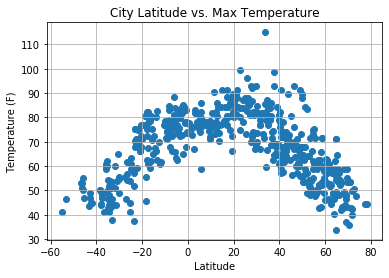

In [20]:
weather_df['Max Temp'] = weather_df['Max Temp'].replace('', np.nan)
weather_df = weather_df.dropna()
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")

plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

        
plt.show()

## Latitude vs. Humidity Plot

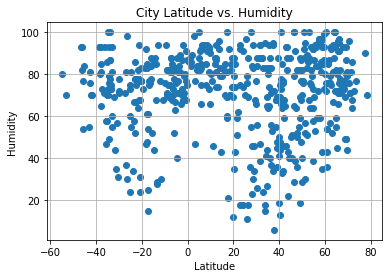

In [22]:

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title(f'City Latitude vs. Humidity')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

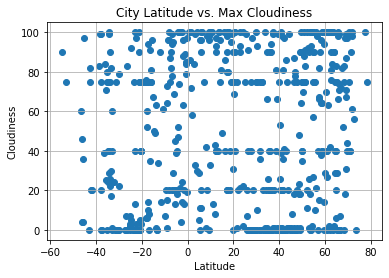

In [24]:

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")


plt.title(f'City Latitude vs. Max Cloudiness')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

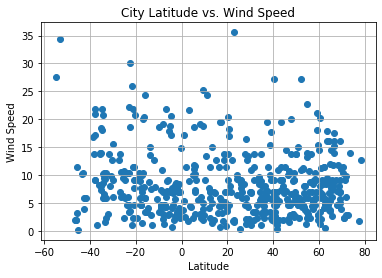

In [25]:

plt.scatter(weather_df["Lat"], weather_df["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()